###Machine Learning
####2nd individual project
ECE - NTUA - 7th semester -Academic Year 2024-25



### Introduction

In this exercise, you will explore clustering and dimensionality reduction techniques in images, starting with hyperspectral data and moving on to remote sensing data.

- **Part 1**: You will use the **k-means** clustering method, as well as **fuzzy c-means**, in combination with the **PCA** dimensionality reduction method, to analyze a hyperspectral image.

- **Part 2**: You will work with a remote sensing dataset and, with the help of a pre-trained CNN, extract image features for clustering, comparing the results with pixel-based clustering.

### 1. Loading hyperspectral image and its labels

Download the hyperspectral image `salinas_image.npy` and the corresponding labels `salinas_labels.npy` from Google Drive:
https://drive.google.com/drive/folders/1DAKjz0IZkaorrHykD8R0KJctpMBRLqSs?usp=sharing

1.a. Load the image and the corresponding labels using the np.load function.

In [1]:
# 1.1.a

import numpy as np

image_array = np.load("salinas_image.npy")
labels = np.load("salinas_labels.npy")

The annotations you uploaded assign each pixel of the hyperspectral image to one of 16 different categories:

```python
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]
```

### 2. Data Visualization and Exploratory Analysis

Present information using code for the following:

2a. Find the height and width of the image, as well as the number of hyperspectral channels

2b. Plot the 3rd, 65th, and 95th channels of the image on the same diagram using matplotlib

2c. Calculate the number of different crop classes in the annotations

2d. Plot the annotations using matplotlib. Add additional explanatory captions using the library for each annotation (use the `classes` list provided earlier.)

2e. Calculate how many pixels in the image correspond to each annotation.

In [2]:
# 1.2a

print("Image shape: ", image_array.shape)

height = image_array.shape[0]
width = image_array.shape[1]
num_channels = image_array.shape[2]

print(f"Height: {height}")
print(f"Width: {width}")
print(f"Number of hyperspectral channels: {num_channels}")

Image shape:  (512, 217, 204)
Height: 512
Width: 217
Number of hyperspectral channels: 204


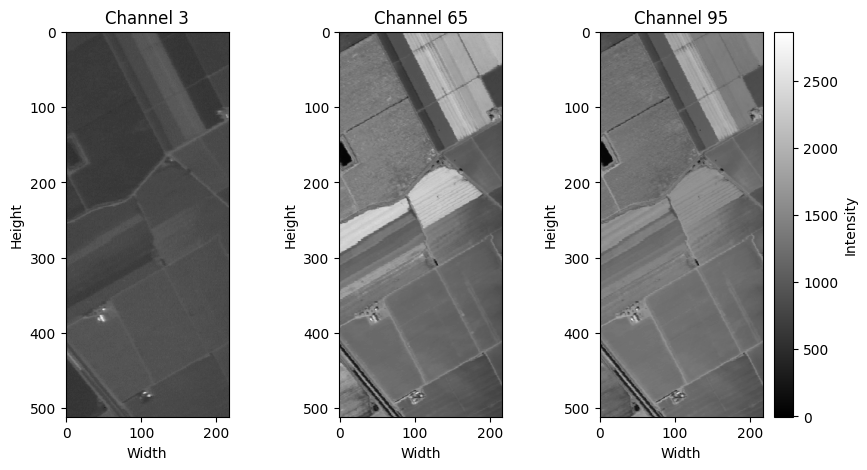

In [3]:
# 1.2b
import matplotlib.pyplot as plt

channel_3 = image_array[:, :, 3]
channel_65 = image_array[:, :, 65]
channel_95 = image_array[:, :, 95]

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(channel_3, cmap='grey')
plt.title('Channel 3')
plt.xlabel('Width')
plt.ylabel('Height')

plt.subplot(1, 3, 2)
plt.imshow(channel_65, cmap='grey')
plt.title('Channel 65')
plt.xlabel('Width')
plt.ylabel('Height')

plt.subplot(1, 3, 3)
plt.imshow(channel_95, cmap='grey')
plt.title('Channel 95')
plt.colorbar(label='Intensity')
plt.xlabel('Width')
plt.ylabel('Height')

plt.show()

In [4]:
# 1.2c

# finding the number of different categories in the labels
unique_classes = np.unique(labels)
num_unique_categories = len(unique_classes)
print(f"Number of unique categories is: {num_unique_categories-1}", )

Number of unique categories is: 16


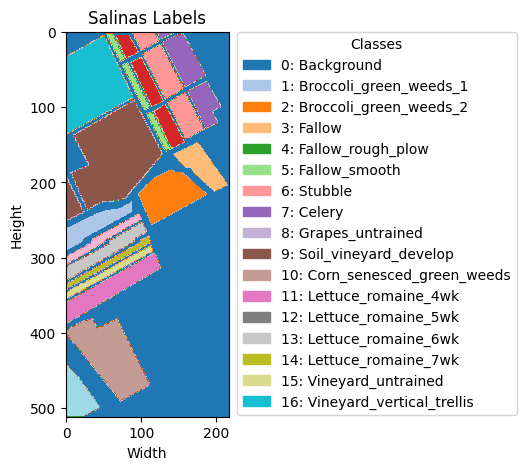

In [5]:
# 1.2d
import matplotlib.patches as mpatches

# plot the labels
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]

legend_patches = []
for cls in unique_classes:
        legend_patches.append(
            mpatches.Patch(color=plt.cm.tab20(cls / len(classes)), label=f"{cls}: {classes[cls]}")
        )
plt.figure(figsize=(10, 5))
plt.imshow(labels, cmap='tab20')
plt.title('Salinas Labels')
plt.xlabel('Width')
plt.ylabel('Height')

plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title="Classes")
plt.show()

In [6]:
# 1.2e

# Get unique labels and their pixel counts
unique_classes, pixel_counts = np.unique(labels, return_counts=True)

for cls, count in zip(unique_classes, pixel_counts):
  print(f"Label {cls}: {count} pixels")

Label 0: 56975 pixels
Label 1: 2009 pixels
Label 2: 3726 pixels
Label 3: 1976 pixels
Label 4: 1394 pixels
Label 5: 2678 pixels
Label 6: 3959 pixels
Label 7: 3579 pixels
Label 8: 11271 pixels
Label 9: 6203 pixels
Label 10: 3278 pixels
Label 11: 1068 pixels
Label 12: 1927 pixels
Label 13: 916 pixels
Label 14: 1070 pixels
Label 15: 7268 pixels
Label 16: 1807 pixels


### 3. Finding spectral signatures

3.a. Convert the hyperspectral image and the annotations into a format suitable for further processing. The image should be converted into an N x K array, where N is the number of pixels and K is the number of channels. The annotations should be converted into a vector of length N.

💡 Use `numpy reshape`

In [7]:
# 1.3a
reshaped_image_array = np.reshape(image_array, (height * width, num_channels))
reshaped_labels = np.reshape(labels, (height * width))

3.b. Select a random pixel of the image from each category, and plot the hyperspectral signature of the selected pixels.

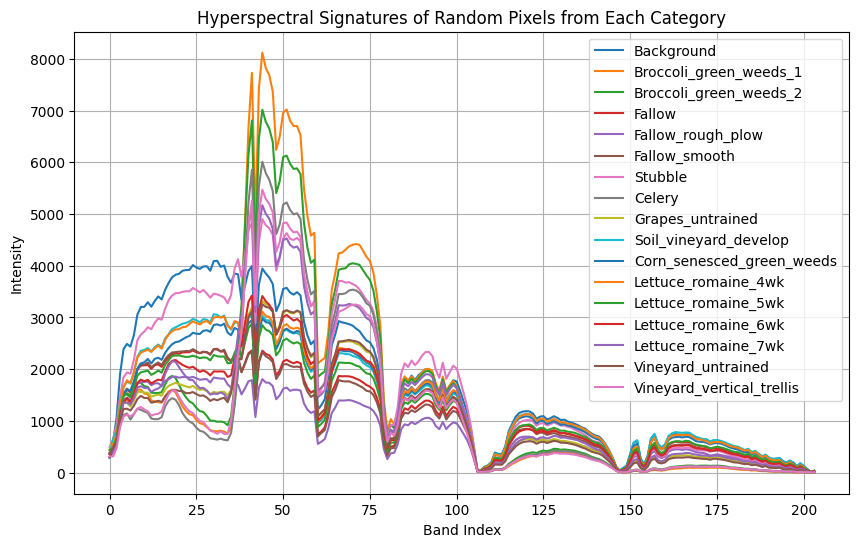

In [8]:
# 1.3b

# Pixel selection
category_signatures = {}

for ctg in unique_classes:
    # Find all pixels belonging to the current category
    category_pixels = np.argwhere(reshaped_labels == ctg)

    # Select a random pixel index from the available category pixels
    pixel_index = category_pixels[np.random.choice(category_pixels.shape[0])][0]

    # Extract the hyperspectral signature for the chosen pixel
    spectral_signature = reshaped_image_array[pixel_index, :]
    category_signatures[ctg] = spectral_signature

# Plot the hyperspectral signatures for the selected pixels
plt.figure(figsize=(10, 6))
for category, signature in category_signatures.items():
    class_name = classes[category]
    plt.plot(range(signature.shape[0]), signature, label=f"{class_name}")

plt.title("Hyperspectral Signatures of Random Pixels from Each Category")
plt.xlabel("Band Index")
plt.ylabel("Intensity")
plt.legend()
plt.grid(True)
plt.show()


3.c. Record your observations and conclusions. Try to answer the following questions:

* Based on the previous diagrams, do you think that some crops are easier to separate than others based on their spectral signature?
* Do you think that all channels provide useful information for separation?

Answer:
We observe that some crops are easier to separate than others based on their spectral signature. For example, crops like "Broccoli_green_weeds_2" and "Broccoli_green_weeds_1" have distinct peaks in specific bands, mainly around the 40-60 range. On the other hand, crops like "Lettuce_romaine_4wk", "Lettuce_romaine_5wk", "Lettuce_romaine_6wk" and "Lettuce_romaine_7wk" have similar spectral signatures, which makes them difficult to separate. The same is observed in categories like "Grapes_untrained" and "Vineyard_untrained", which have overlapping spectral lines.

Regarding channels, not all are equally useful for separating categories. In certain bands, such as around the 40-60 and 80-100 range, there are large differences in the intensities between the classes, making them important for separation. In contrast, in regions with higher bands, such as from 150 to 200, the spectral signatures are almost flat or very close together and do not provide much information. This suggests that these bands are less useful. Having many channels increases the dimensionality of the data, but many of them are unnecessary or redundant.

3.d. Draw a heatmap, showing the correlation between the different channels

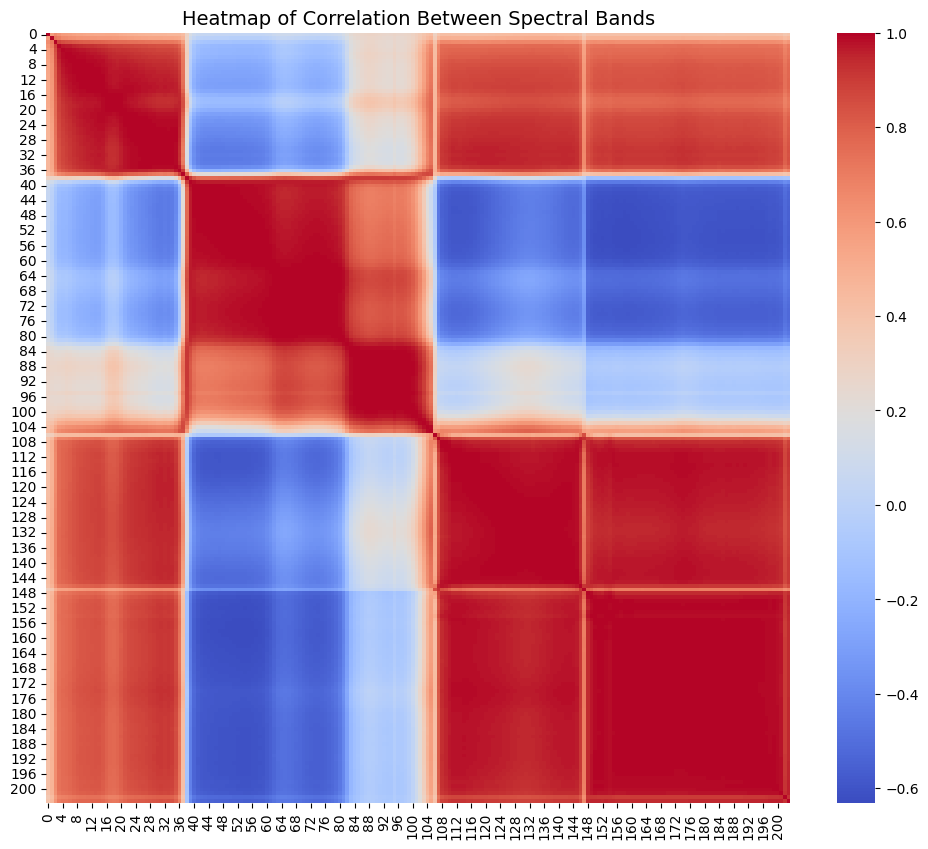

In [9]:
# 1.3d

import seaborn as sns

# Correlation matrix between bands
correlation_matrix = np.corrcoef(reshaped_image_array.T)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Heatmap of Correlation Between Spectral Bands", fontsize=14)

plt.show()


### 4. Clustering using the KMeans algorithm

4.a. Apply the KMeans algorithm (sklearn.cluster) to the data (provided you performed the preprocessing in Step 3). Use the value `n_cluster=17`.

Evaluate the performance of the algorithm using the following metrics:

* Adjusted Rand Index
* Silhouette Score

The Adjusted Rand Index (ARI) measures how many pairs of points were correctly classified either into the same cluster or into different clusters using the true categories, taking into account random assignments. It has values ​​from -1 (very poor clustering) to 1 (perfect alignment with the categories), while a value of 0 indicates random clustering. It is useful for assessing accuracy on data with known categories.

In contrast, the Silhouette Score measures how well a data point fits its cluster relative to the rest of the clusters. It calculates the average distance of a point from other points in the same cluster (cohesion) and the average distance from points in the nearest other cluster (separation). The score ranges from -1 to 1, where values ​​close to 1 indicate good clustering, values ​​close to 0 indicate overlapping clusters, and negative values ​​indicate poor clustering.

The Silhouette Score is an internal evaluation measure that examines the cohesion and separation of clusters without taking into account the true categories. In contrast, the Adjusted Rand Index (ARI) is an external evaluation measure that compares clusters to the true categories (ground truth). Using both together provides an overall picture of the quality of clustering.

In [15]:
# 1.4a.1 clustering the pixels based on their signatures

from sklearn.cluster import KMeans

# data
x = reshaped_image_array

# Initialization of kMeans model
kmeans = KMeans(n_clusters=17, init="random", n_init=10, random_state=42)
# Train
kmeans.fit(x)
# Get cluster labels for each pixel
cluster_labels = kmeans.labels_      # outputs 1-D array of cluster labels (N,), each element corresponds to the cluster assigned to a specific pixel
cluster_labels_image = cluster_labels.reshape(height, width)


In [11]:
# 1.4a.2 Metrics

from sklearn.metrics import adjusted_rand_score, silhouette_score

# Adjusted Rand Index
ari = adjusted_rand_score(reshaped_labels, cluster_labels)
print("Adjusted Rand Index:", ari)

# Silhouette_score
silhouette = silhouette_score(x, cluster_labels)
print("Silhouette Score:", silhouette)

Adjusted Rand Index: 0.14885588541554629
Silhouette Score: 0.4172084026633798


4.b. Using the clustering results, plot the classification again using matplotlib in image format, using the cluster to which each pixel has been assigned.

Compare with the original image of the annotations. What do you notice?

<ipython-input-35-b92f192de9f9>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  custom_cmap = colors.ListedColormap(plt.cm.get_cmap('tab20').colors[:17])


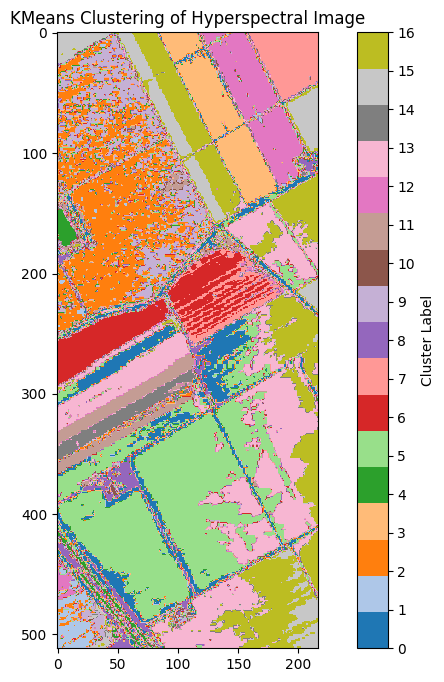

In [35]:
# 1.4b

from matplotlib import colors

custom_cmap = colors.ListedColormap(plt.cm.get_cmap('tab20').colors[:17])

plt.figure(figsize=(10, 8))
plt.imshow(cluster_labels_image, cmap=custom_cmap)
plt.title("KMeans Clustering of Hyperspectral Image")
plt.colorbar(label="Cluster Label", ticks=range(17))
plt.show()


Comparing with the original image we notice that there are many color blends, i.e. pixels that have been distributed in the wrong clusters. Small areas with noisy clustering or excessively small clusters are observed in places where the spectral signature of the pixels is probably not clear.


4.c. Implementing the Fuzzy C-Means Algorithm

The **Fuzzy C-Means** algorithm is not included in scikit-learn, but we can implement it using the `fcmeans` library.

#### **Step 1: Install the library**
First, install the `fcmeans` library by running the following command in a shell:

```bash
!pip install fuzzy-c-means
```

#### Step 2: Run the algorithm
fcmeans provides functionality similar to the scikit-learn training method, allowing easy integration into your workflow.

For more information on using the library, see the documentation: https://fuzzy-c-means.readthedocs.io/en/latest/

Recalculate the Silhouette Score and ARI and compare with the previous methods.

Note. The algorithm will run for about 15 minutes.

In [18]:
!pip install fuzzy-c-means

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.15.1
    Uninstalling typer-0.15.1:
      Successfully uninstalled typer-0.15.1
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


In [19]:
# 1.4c

from fcmeans import FCM
import numpy as np
from sklearn.metrics import adjusted_rand_score, silhouette_score

# data
x = reshaped_image_array

# Initialization of fcMeans model
fcm = FCM(n_clusters=17, random_state=42)
# Training
fcm.fit(x)
# Predict cluster labels
cluster_labels_fuzzy = fcm.predict(x)
# Reshape the cluster labels to match image dimensions
cluster_labels_image_fuzzy = cluster_labels_fuzzy.reshape(height, width)

ari_fuzzy = adjusted_rand_score(reshaped_labels, cluster_labels_fuzzy)
print("Adjusted Rand Index (Fuzzy C-Means):", ari_fuzzy)

silhouette_fuzzy = silhouette_score(x, cluster_labels_fuzzy)
print("Silhouette Score (Fuzzy C-Means):", silhouette_fuzzy)

Adjusted Rand Index (Fuzzy C-Means): 0.1352530332435927
Silhouette Score (Fuzzy C-Means): 0.35717550636894235


Answer:
KMeans slightly outperforms Fuzzy C-Means, as shown by the Adjusted Rand Index (ARI) and Silhouette Score metrics. KMeans achieved ARI = 0.1489 and Silhouette Score = 0.4172, while Fuzzy C-Means had ARI = 0.1353 and Silhouette Score = 0.3572. The difference in values ​​indicates that KMeans has better agreement with the real classes and creates more distinct and coherent clusters. In contrast, Fuzzy C-Means, although more flexible in dealing with fuzzy data, produces clusters with more overlap and less coherence, leading to lower performance. The slightly better performance of KMeans indicates that it is more suitable for this hyperspectral image.

### 5. Data dimensionality reduction

5.a. Apply the PCA dimensionality reduction method to the data. Select `n_components=3`

In [20]:
# 1.5a Dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
reduced_data = pca.fit_transform(reshaped_image_array)

5.b. What percentage of the data variance do you retain with `n_components=3`?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [21]:
# 1.5b Variance ratio

variance_ratio = pca.explained_variance_ratio_
print("Variance Ratio:", variance_ratio)

Variance Ratio: [0.74473713 0.23531325 0.01134124]


### 6. Combining dimensionality reduction and kmeans

6.a. Apply the kmeans algorithm to the reduced dimensionality data `n_components=3`, and recalculate the metrics. What conclusions do you draw?

6.b. Try different values ​​for n_components (from 1 to 5) and rerun k-means each time, calculating the final scores. For each metric, make a chart with the number of n_components on the X-axis and the value of the metric on the Y-axis. What conclusions do you draw?

In [32]:
# 1.6a KMeans in reduced data

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# data
x_reduced = reduced_data
# Initialization of kMeans model
kmeans = KMeans(n_clusters=17, init="random", n_init=10, random_state=42)
# Train
kmeans.fit(x_reduced)
# Get cluster labels for each pixel
cluster_labels_reduced = kmeans.labels_      # outputs 1-D array of cluster labels (N,), each element corresponds to the cluster assigned to a specific pixel
cluster_labels_image_reduced = cluster_labels_reduced.reshape(height, width)

# Metrics
# Adjusted Rand Index
ari = adjusted_rand_score(reshaped_labels, cluster_labels_reduced)
print("Adjusted Rand Index:", ari)

# Silhouette_score
silhouette = silhouette_score(x_reduced, cluster_labels_reduced)
print("Silhouette Score:", silhouette)

Adjusted Rand Index: 0.1455418404972853
Silhouette Score: 0.4390566173090946


Answer:
By applying KMeans to the reduced dimensionality data with n_components = 3, we observe that the Adjusted Rand Index (ARI) is 0.1455, a value that remains almost the same as the corresponding one in the original data (0.1489), which indicates that the dimensionality reduction via PCA did not significantly improve the algorithm’s ability to reproduce the true categories. In contrast, the Silhouette Score increased to 0.4390 from 0.4172, indicating that the clusters became more compact and better separated after the data complexity was reduced. Overall, the dimensionality reduction to 3 principal components contributed to the improvement of the cluster separation, but did not lead to a noticeable improvement in the accuracy in reproducing the true categories. This suggests that the 3 components do not fully capture the information required to solve the problem.

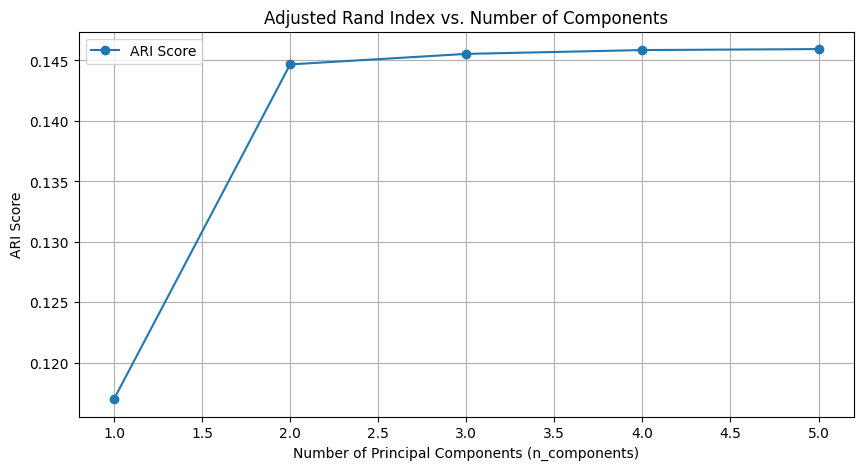

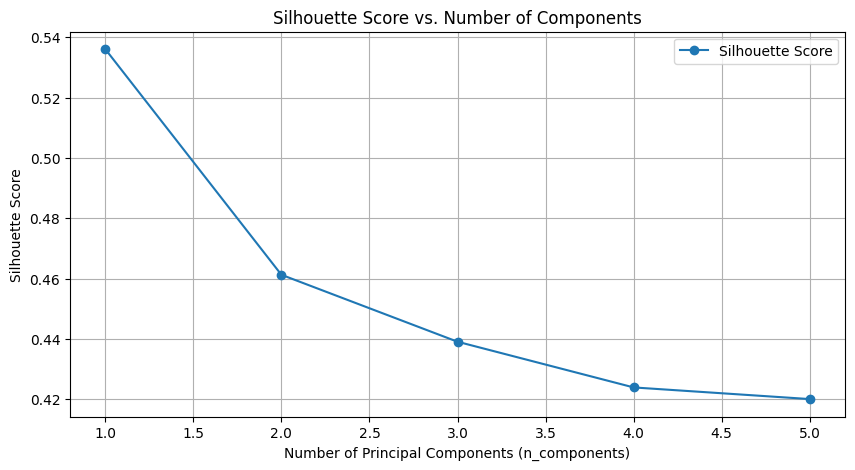

In [33]:
# 1.6b n_components testing

# Lists to store scores for each value of n_components
n_components_list = range(1, 6)
ari_scores_multiple = []
silhouette_scores_multiple = []

# Loop over different values of n_components
for n_components in n_components_list:
    # Apply PCA
    pca_multiple = PCA(n_components=n_components)
    reduced_data_multiple = pca_multiple.fit_transform(reshaped_image_array)

    # Apply KMeans
    kmeans_pca_multiple = KMeans(n_clusters=17, init="random", n_init=10, random_state=42)
    cluster_labels_multiple = kmeans_pca_multiple.fit_predict(reduced_data_multiple)

    # Compute metrics
    ari_multiple = adjusted_rand_score(reshaped_labels, cluster_labels_multiple)
    silhouette_multiple = silhouette_score(reduced_data_multiple, cluster_labels_multiple)

    # Store the scores
    ari_scores_multiple.append(ari_multiple)
    silhouette_scores_multiple.append(silhouette_multiple)

# Plot the results

# Plot ARI
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, ari_scores_multiple, marker='o', label="ARI Score")
plt.xlabel("Number of Principal Components (n_components)")
plt.ylabel("ARI Score")
plt.title("Adjusted Rand Index vs. Number of Components")
plt.grid()
plt.legend()
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, silhouette_scores_multiple, marker='o', label="Silhouette Score")
plt.xlabel("Number of Principal Components (n_components)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Components")
plt.grid()
plt.legend()
plt.show()

Answer: Based on the results, we observe that the Adjusted Rand Index (ARI) increases sharply when the number of components (n_components) increases from 1 to 2 and then stabilizes around the value 0.145, which indicates that using 2 or more components is enough to preserve the information required to reproduce the true categories. In contrast, the Silhouette Score gradually decreases as the number of components increases, with its maximum value appearing when n_components=1 (0.54), which indicates more compact and separated clusters at low dimensionality. This means that increasing dimensionality leads to less cluster cohesion, but at the same time allows the algorithm to better approximate the true categories. Overall, choosing 2-3 components seems to offer a good compromise between information preservation and cluster coherence, while using fewer components may lead to cleaner clusters but lower alignment with the ground truth.

# Part 2: Using a Pretrained CNN for Clustering

In this part, we will use the **Keras** library, which provides easy integration of pretrained CNN models and ease of data management. Our goal is to demonstrate the power of features extracted from pretrained CNNs (Convolutional Neural Networks) for clustering remote sensing data.

We will use a subset of the **EuroSAT** dataset, which consists of satellite images divided into 10 categories (e.g., crops, forests, urban areas). The features that we will extract from a pretrained CNN will be used to cluster the images.

---

## 1. Load the dataset

For the purposes of this exercise, we will use the **EuroSAT** dataset. EuroSAT contains satellite images organized into folders by category.

---

### 1.a. Download and unzip EuroSAT

EuroSAT is not directly supported by Keras, but you can download and unzip it with the following commands:

```bash
# Download EuroSAT
!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate

# Unzip the file
!unzip EuroSAT.zip
```

### 1.b. Integrating Keras via TensorFlow
The Keras library is integrated with TensorFlow. To use it, you need to import the TensorFlow library and use the Keras classes via tensorflow.keras.

Here's how to load EuroSAT using ImageDataGenerator:


In [ ]:
 # 2.1b

 !wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate
 ! unzip EuroSAT.zip

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

data_dir = os.path.join('2750')
print(f'Τα δεδομένα βρίσκονται στο: {data_dir}')

# Normalize and load the data
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.90  # load a small part of each class for faster runs by setting a large validation percentage and loading the training
)

dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224), # mobilenetv3 accepts images of size 224 x 224
    batch_size=1, # each call to the iterator loads an image - label pair
    shuffle=False,
    subset='training'
)

print(f'Φορτώθηκαν {len(dataset) * dataset.batch_size} εικόνες.')


Streaming output truncated to the last 5000 lines.
  inflating: 2750/SeaLake/SeaLake_263.jpg  
  inflating: 2750/SeaLake/SeaLake_967.jpg  
  inflating: 2750/SeaLake/SeaLake_515.jpg  
  inflating: 2750/SeaLake/SeaLake_1465.jpg  
  inflating: 2750/SeaLake/SeaLake_1817.jpg  
  inflating: 2750/SeaLake/SeaLake_2902.jpg  
  inflating: 2750/SeaLake/SeaLake_2570.jpg  
  inflating: 2750/SeaLake/SeaLake_1004.jpg  
  inflating: 2750/SeaLake/SeaLake_174.jpg  
  inflating: 2750/SeaLake/SeaLake_2111.jpg  
  inflating: 2750/SeaLake/SeaLake_2388.jpg  
  inflating: 2750/SeaLake/SeaLake_1948.jpg  
  inflating: 2750/SeaLake/SeaLake_838.jpg  
  inflating: 2750/SeaLake/SeaLake_2738.jpg  
  inflating: 2750/SeaLake/SeaLake_1999.jpg  
  inflating: 2750/SeaLake/SeaLake_2359.jpg  
  inflating: 2750/SeaLake/SeaLake_2660.jpg  
  inflating: 2750/SeaLake/SeaLake_1775.jpg  
  inflating: 2750/SeaLake/SeaLake_605.jpg  
  inflating: 2750/SeaLake/SeaLake_2201.jpg  
  inflating: 2750/SeaLake/SeaLake_264.jpg  
  inflating

---

## 2. Using a Pretrained CNN to Extract Features

In this step, you will use the pretrained model **MobileNetV3Small**, which is available through Keras. The model is trained on the **ImageNet** dataset and can be used to extract powerful features from images. These features will be used to cluster the data.

---

### 2.a. Create a Feature Extractor

1. **Loading MobileNetV3Small**:
- Use the `tensorflow.keras.applications` library to load the pretrained model **MobileNetV3Small**.
- Make sure to set the `include_top=False` parameter to remove the final classification layer.

2. **Pooling**:
- Enable average pooling on the final layer with the parameter `pooling='avg'`. This will ensure that the features are condensed into a manageable number of dimensions.


In [ ]:
# 2.2.a

from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.models import Model

# Load MobileNetV3Small
base_model = MobileNetV3Small(
    weights='imagenet',          # Using pretrained weights from ImageNet
    include_top=False,           # Remove the final classification layer.
    input_shape=(224, 224, 3),    # Images with size 224x224x3
    pooling='avg'                # Average pooling for feature extraction
)

# Add Global Average Pooling (condensation of features)
feature_extractor = Model(
    inputs=base_model.input,
    outputs=base_model.output
)

# Checking the architecture
feature_extractor.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 113, 113, 16)   │              0 │ activation[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 56, 56, 16)     │            144 │ expanded_conv_depthwi… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 56, 56, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 56, 56, 16)     │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │              0 │ re_lu[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │            136 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │              0 │ expanded_conv_squeeze… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │            144 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1, 1, 16)       │              0 │ expanded_conv_squeeze… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 1, 1, 16)       │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)  

 Total params: 939,120 (3.58 MB)

 Trainable params: 927,008 (3.54 MB)

 Non-trainable params: 12,112 (47.31 KB)

### 2.b. Extracting Features from Images

Use the feature extractor you created to process the dataset (`dataset`) and extract the features from the images via the `.predict()` method. Store the extracted features in a variable and print their dimensions to verify that the extraction was done correctly. These features will be used in the next step for clustering.


In [ ]:
# 2.2.b

# Extract features from the dataset
features = base_model.predict(dataset, verbose=1)

print(f"Extracted features shape: {features.shape}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2700/2700 ━━━━━━━━━━━━━━━━━━━━ 66s 24ms/step
Extracted features shape: (2700, 576)


### 2.c. Feature Extraction from Images

Apply the **KMeans** algorithm to the extracted features by setting the number of clusters to 10, and calculate the Adjusted Rand Index metric.

In [ ]:
# 2.2.c

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# kmeans clustering
kmeans_cnn = KMeans(n_clusters=10, random_state=0)
cluster_labels = kmeans_cnn.fit_predict(features)

# Extract labels from the dataset
dataset_labels = dataset.classes

# ARI metric
ari = adjusted_rand_score(dataset_labels, cluster_labels)
print(f'Adjusted Rand Index: {ari}')

Adjusted Rand Index: 0.47883260285709683


### 2d: Clustering Using Only Pixel Values

In this last phase, you will repeat the clustering **without using a pretrained CNN model**, but using only the pixels of the images as features.

1. **Pixel Normalization**:
- Each image must be rearranged into a one-dimensional array and normalized to the values ​​[0, 1].

2. **Data Fusion**:
- Combine the data from all the images into a large array with dimensions `(N, M)`, where:
- `N`: The number of images.
- `M`: The number of pixels in each image.

3. **Apply KMeans**:
- Use the KMeans algorithm to cluster the images.

4. **Metric Calculation**:
- Calculate the Adjusted Rand Index.

5. **Compare Results**:
- Compare the results with the clustering done using the features from the CNN.

---


In [ ]:
# 2.2.d

# Reshape images into 1D arrays
pixel_data = []

for batch_images, batch_labels in dataset:
    # Reshape each image and normalize
    reshaped_images = batch_images.reshape(batch_images.shape[0], -1) # (Batch_size, 224*224*3)
    normalized_images = reshaped_images / 255.0 # Normalize to values ​​[0, 1]

    pixel_data.append(normalized_images)

    # Stop when data runs out
    if len(pixel_data) >= len(dataset):
        break

# Consolidate all batches into one array
pixel_data = np.vstack(pixel_data) # (N, M)

print(f"Pixel data shape: {pixel_data.shape}")

# Apply KMeans
kmeans_pixels = KMeans(n_clusters=10, random_state=0)
cluster_labels_pixels = kmeans_pixels.fit_predict(pixel_data)

# Calculate Adjusted Rand Index
ari_score_pixels = adjusted_rand_score(dataset_labels, cluster_labels_pixels)

print(f"ARI Score with pixel data: {ari_score_pixels:.4f}")


Pixel data shape: (2700, 150528)
ARI Score with pixel data: 0.1408


Answer: We observe that the ARI score in clustering with only Pixel values ​​is lower compared to using features from CNN. This is due to the fact that CNNs extract rich high-level features that include important information about the image while using pixels directly does not provide such information (such as shapes or textures).

### 2.e. Visualize Results

Use the clustering results from both the features extracted by the CNN and the pixel values. For each method, randomly select 5 images from each cluster and plot them on a grid, using the matplotlib library.

Explain the clustering results:
- Is the separation of the images into clusters evident?
- Do you observe common features or patterns in the images of each cluster?
- How do the clusters created from the CNN features compare to those created from the pixel values?

Analyze whether the use of the features extracted by the CNN helped to better separate the data and how this reflects on the clusters and their contents.

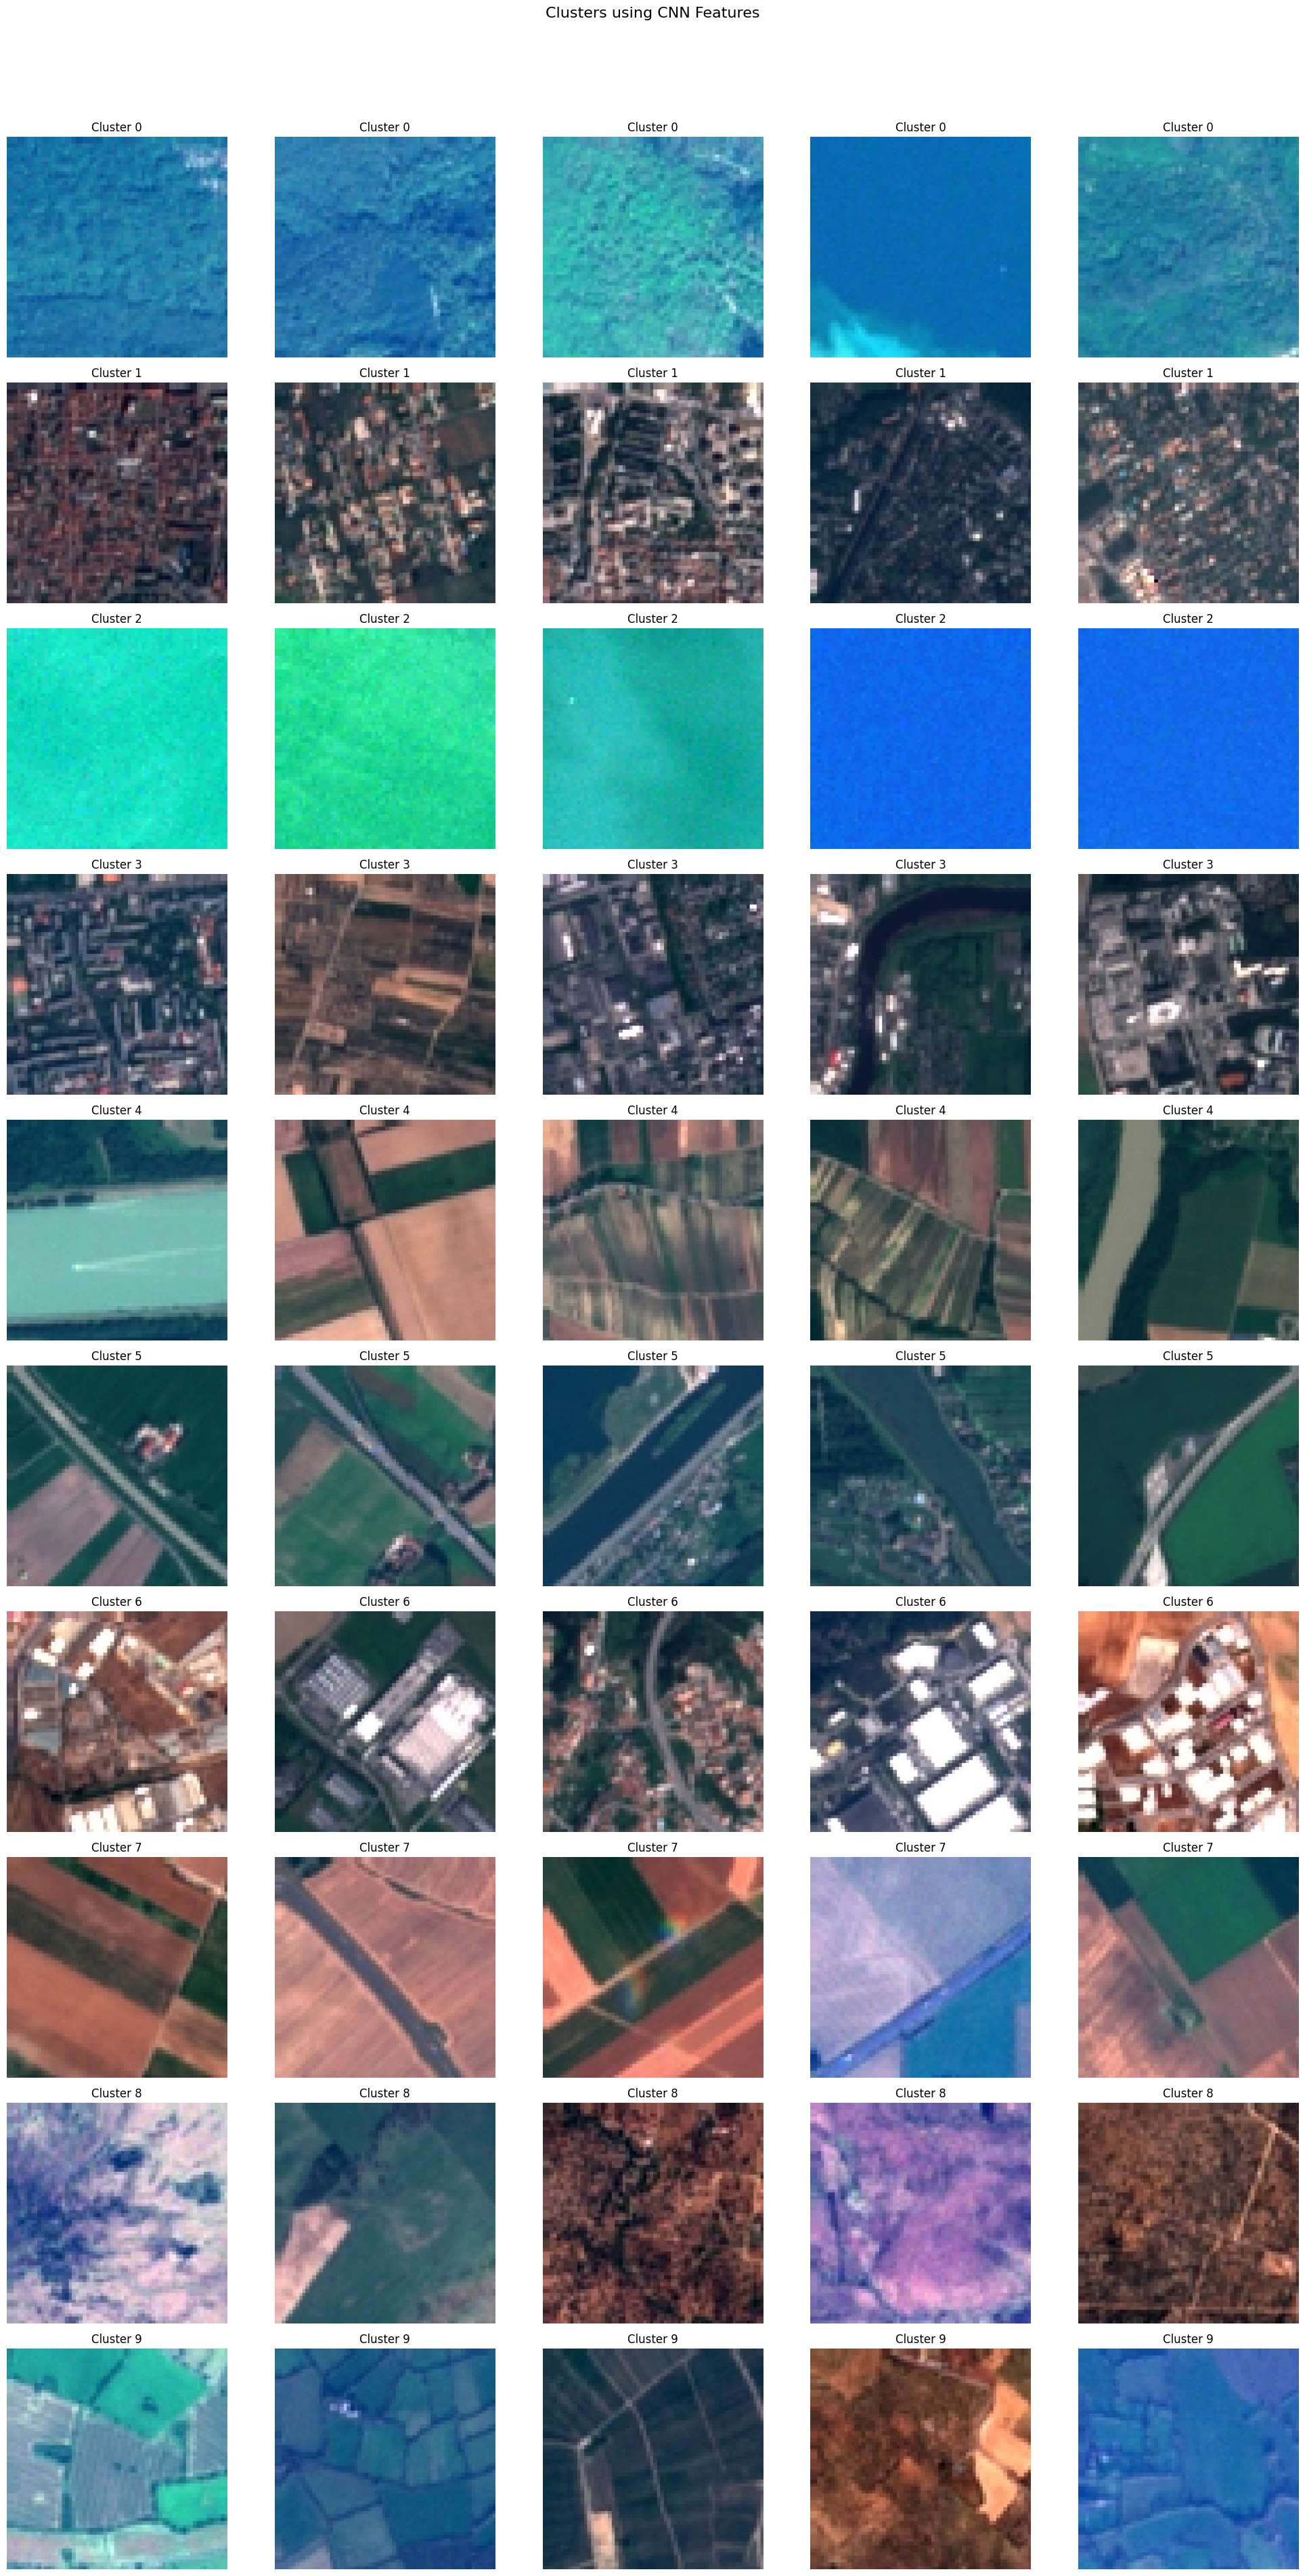

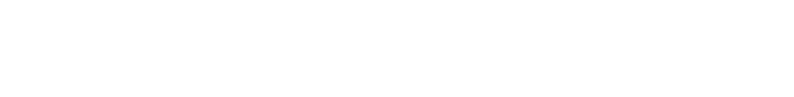

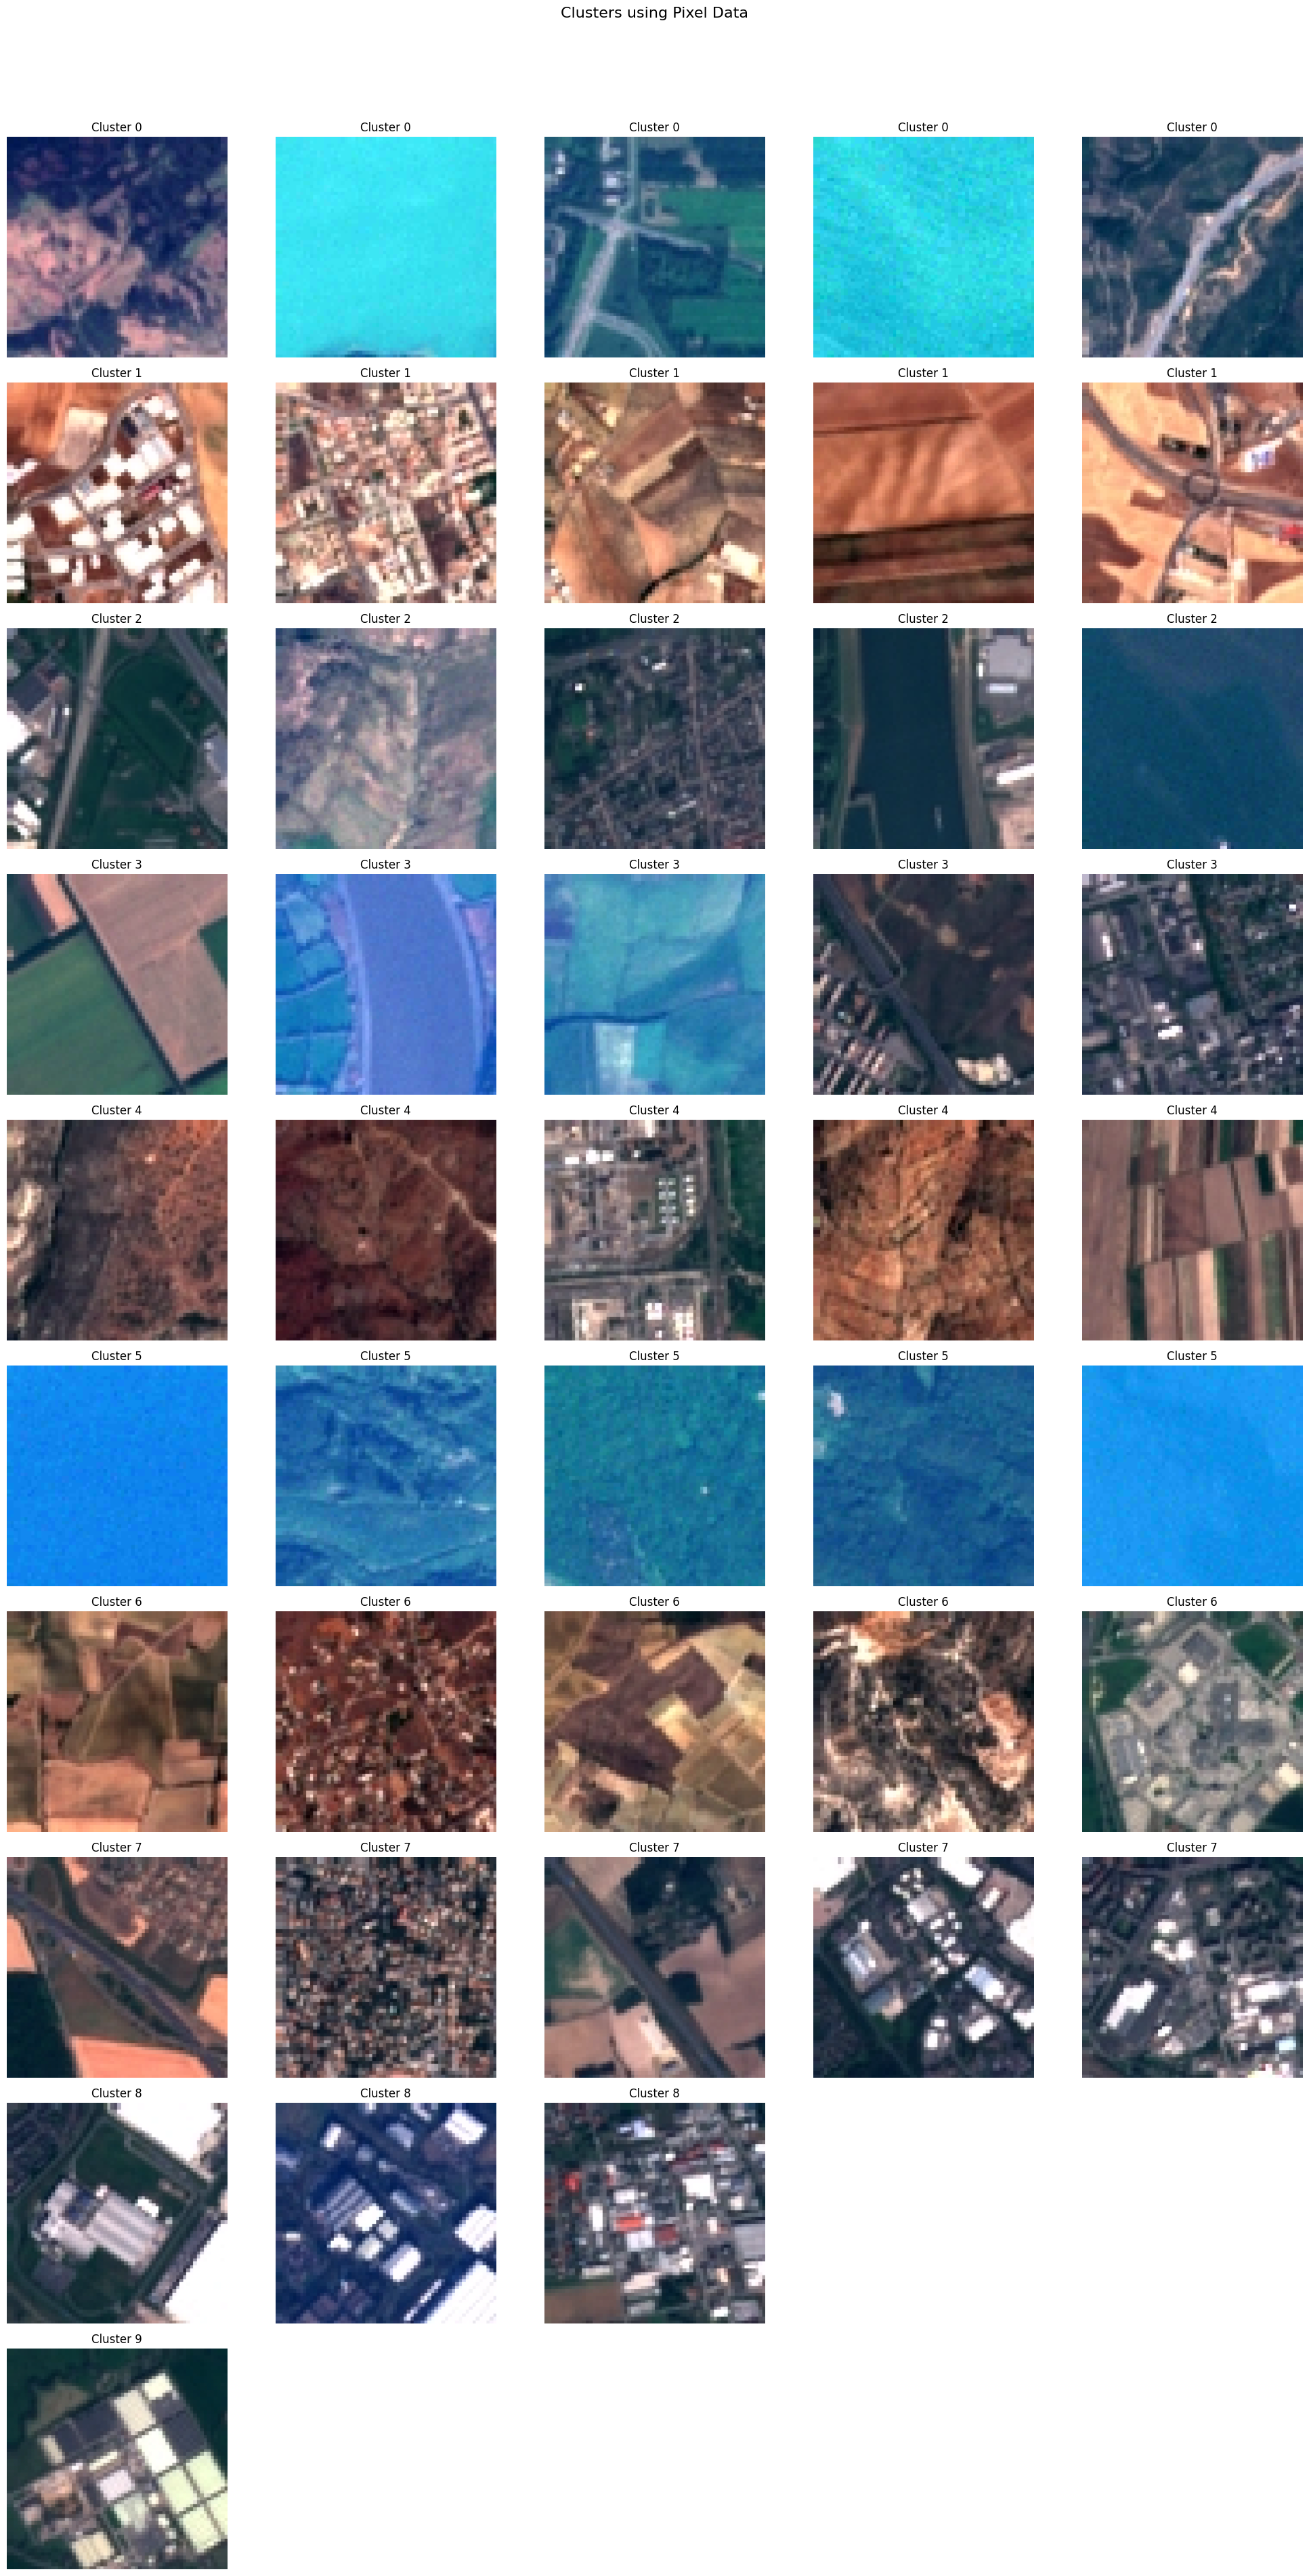

In [ ]:
# 2.2.e

import numpy as np
import matplotlib.pyplot as plt

def plot_grid_for_clusters(features, labels, dataset, title, num_images=5):
    """
    Visualize a grid of images for each cluster.

    Args:
        features (array): Image features (CNN or pixel-based).
        labels (array): Cluster labels from KMeans.
        dataset: Original dataset object for retrieving images.
        title (str): Title for the plot.
        num_images (int): Number of random images to display per cluster.
    """
    num_clusters = len(set(labels))  # Number of clusters
    plt.figure(figsize=(20, num_clusters * 4))  # Adjust the chart size

    for cluster in range(num_clusters):
        # Find pointers for the current cluster
        cluster_indices = [i for i, lbl in enumerate(labels) if lbl == cluster]

        # Choose random indexes (up to num_images)
        chosen_indices = np.random.choice(cluster_indices, size=min(len(cluster_indices), num_images), replace=False)

        for idx, selected_index in enumerate(chosen_indices):
            # Load image and label from dataset
            image, _ = dataset[selected_index]  # dataset must allow direct access to indexes

            # Reverse normalization for visualization
            image = (image + 1) / 2.0  # From [-1, 1] to [0, 1]
            if image.shape[0] == 1:  # Remove the batch dimension if it exists
                image = np.squeeze(image, axis=0)
            image = (image - image.min()) / (image.max() - image.min())  # Normalize to [0, 1]

            # Image display
            plt.subplot(num_clusters, num_images, cluster * num_images + idx + 1)
            plt.imshow(image)
            plt.title(f"Cluster {cluster}")
            plt.axis("off")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add space for the title
    plt.show()

# Visualization for CNN features
plot_grid_for_clusters(
    features=features,               # Image Features
    labels=cluster_labels,           # Cluster labels from CNN
    dataset=dataset,                 # Original dataset
    title="Clusters using CNN Features",
    num_images=5                     # Images per cluster
)

# Add space between the two views
plt.figure(figsize=(10, 1))
plt.text(0.5, 0.5, " ", fontsize=12, ha="center")
plt.axis("off")

# Visualization for features from Pixel Data
plot_grid_for_clusters(
    features=pixel_data,             # Features from Pixel Data
    labels=cluster_labels_pixels,    # Cluster Labels from Pixel Data
    dataset=dataset,                 # Original dataset
    title="Clusters using Pixel Data",
    num_images=5                     # Images per cluster
)


Answer:

1) We observe that in the visual representation of the results obtained through CNN, the images tend to be grouped into clusters that are more homogeneous in terms of the type of content. For example, one cluster may appear consisting mainly of areas with water or dense vegetation, another with urban construction and buildings, and another with agricultural lands or crops.
When pixel values ​​are used directly, the separation is not so clear. The clusters can consist of images that may have similar color tones but differ in the geographical/structural features they depict.

2) Using features from CNN: The clusters tend to "capture" conceptual features from the images. For example, one cluster may contain images with mostly green color and structures that resemble forests or scrubland, while another cluster may contain images with dense urban construction. In these cases, the patterns are often distinct and are related to the content of the image, not just color.

Using pixel values ​​(raw data): Clusters are often based primarily on color similarities or tonal homogeneity. This means that images with similar tones (e.g., many shades of green or brown) may be grouped together, even if they actually depict different landscape types (e.g., fields, forests, urban areas with green parks, and so on). Thus, clusters resulting from pure pixel values ​​may lack substantial conceptual coherence.

3) Clusters generated by CNN features tend to be more “intelligent” and coherent in terms of content. This is because the neural network has already “learned” to extract intermediate, higher-level features (e.g., shapes, textures, structural patterns) that are closer to human perception of the image. In contrast, direct clustering from pixel values ​​often results in clusters that reflect mainly color and brightness similarities, without conceptual coherence.

4) Using features from a trained CNN helps transform the data space from a simple color value space to a higher-level space. In this space, similar images (e.g., images with a similar structure or similar setting) are placed closer together, while dissimilar images are moved apart. This makes clustering more consistent with human perception of differences between images, thus leading to clusters that are not only separable but also conceptually relevant.